## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [3]:
df = pd.read_csv('tips.csv',encoding='unicode_escape')

### 1. Make a list of categorical and numerical columns in the data.

In [4]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the lists of categorical and numerical columns
print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

Categorical columns:
['sex', 'smoker', 'day', 'time']

Numerical columns:
['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [7]:
# Compute the average bill amount for each day
average_bill_per_day = df.groupby("day")["total_bill"].mean()

# Print the average bill amount for each day
print(average_bill_per_day)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [8]:
# Compute the average tip amount for each gender
average_tip_per_gender = df.groupby("sex")["tip"].mean()

# Print the average tip amount for each gender
print(average_tip_per_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [9]:
# Count the number of customers for each meal category
customer_counts = df["time"].value_counts()

# Print the customer counts for each meal category
print(customer_counts)

time
Dinner    176
Lunch      68
Name: count, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

### 6. Find the busiest day in terms of the orders?

In [11]:
# Find the busiest day in terms of orders
busiest_day = df['day'].value_counts().idxmax()

# Print the busiest day
print("The busiest day in terms of orders:", busiest_day)

The busiest day in terms of orders: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

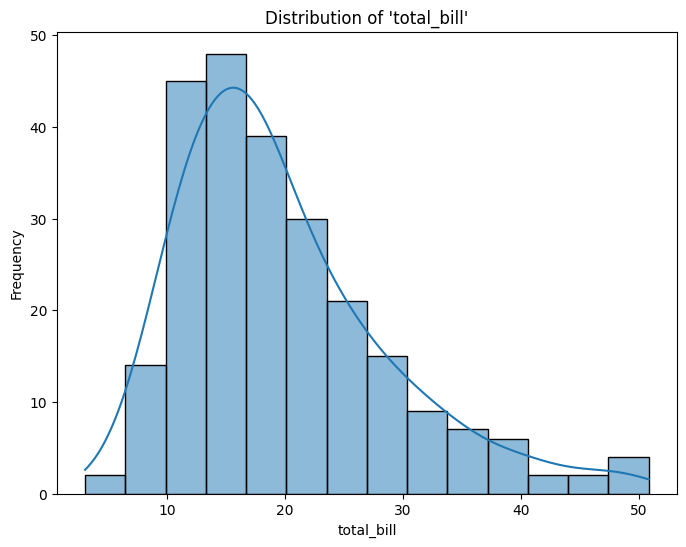

In [16]:
# Plot the histogram of the 'total_bill' variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_bill', kde=True)
plt.title("Distribution of 'total_bill'")
plt.xlabel("total_bill")
plt.ylabel("Frequency")
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

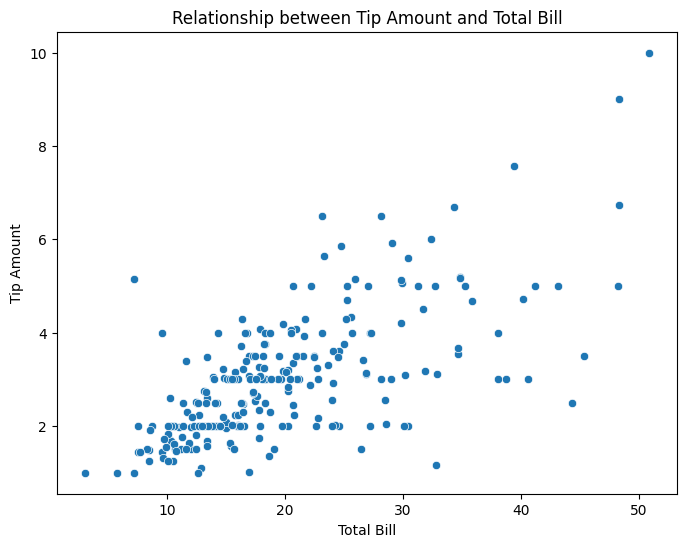

Correlation Coefficient: 0.6757341092113641


In [17]:
# Plot the relationship between the tip amount and the total bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title("Relationship between Tip Amount and Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()

# Calculate the correlation coefficient
correlation = df['total_bill'].corr(df['tip'])
print("Correlation Coefficient:", correlation)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

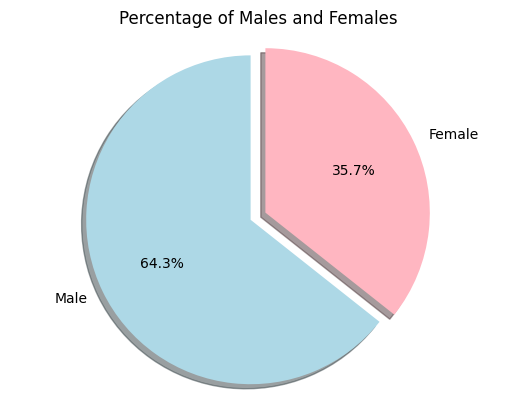

In [18]:
# Calculate the percentage of males and females
gender_counts = df['sex'].value_counts()
total_count = gender_counts.sum()
percentage_male = (gender_counts['Male'] / total_count) * 100
percentage_female = (gender_counts['Female'] / total_count) * 100

# Create a pie chart to display the percentages
labels = ['Male', 'Female']
sizes = [percentage_male, percentage_female]
colors = ['lightblue', 'lightpink']
explode = (0.1, 0)  # To emphasize the first slice (Male)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# 10. Compute the gender-wise count based on smoking habits and display it in the plot

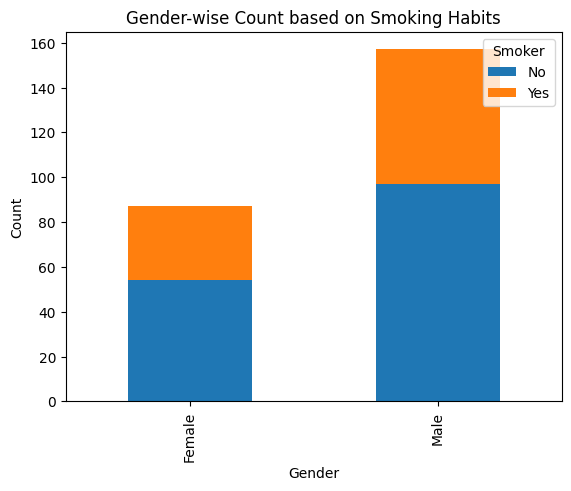

In [19]:
# Compute the gender-wise count based on smoking habits
gender_smoking_count = df.groupby(['sex', 'smoker']).size().unstack()

# Plot the gender-wise count based on smoking habits
gender_smoking_count.plot(kind='bar', stacked=True)
plt.title('Gender-wise Count based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

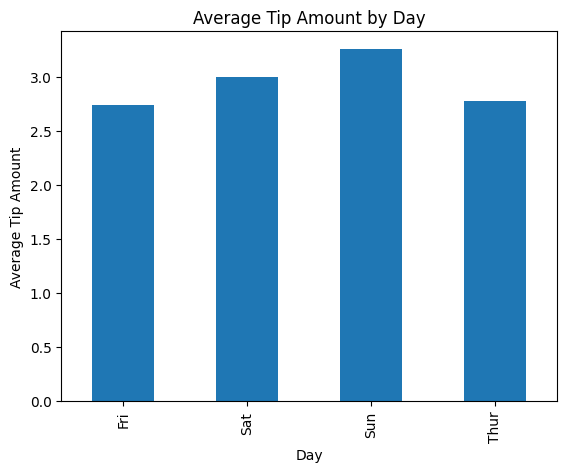

In [20]:
# Compute the average tip amount for different days
average_tip_per_day = df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
average_tip_per_day.plot(kind='bar')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

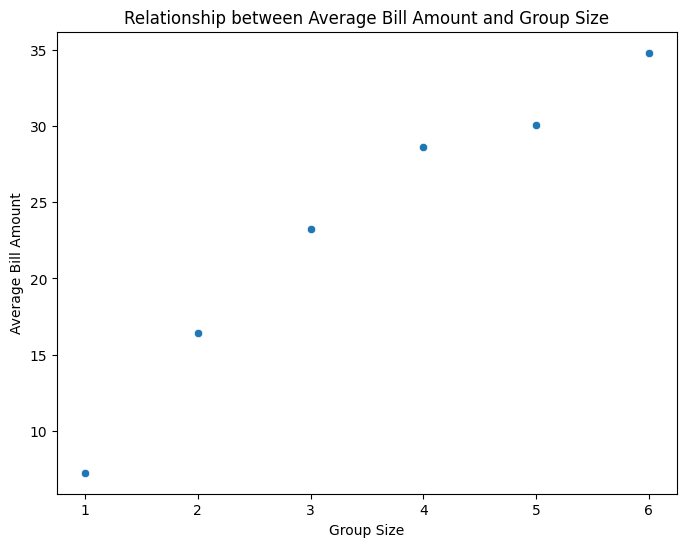

In [21]:
# Calculate the average bill amount for each group size
average_bill_per_group = df.groupby('size')['total_bill'].mean()

# Plot the relationship between average bill amount and group size
plt.figure(figsize=(8, 6))
sns.scatterplot(data=average_bill_per_group, x=average_bill_per_group.index, y=average_bill_per_group.values)
plt.title("Relationship between Average Bill Amount and Group Size")
plt.xlabel("Group Size")
plt.ylabel("Average Bill Amount")
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

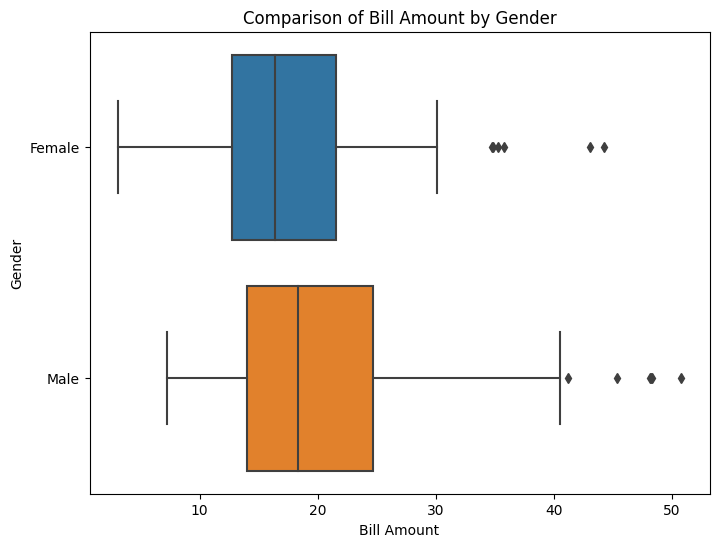

In [22]:
# Plot the horizontal boxplot comparing bill amount based on gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='total_bill', y='sex', orient='h')
plt.title("Comparison of Bill Amount by Gender")
plt.xlabel("Bill Amount")
plt.ylabel("Gender")
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [23]:
# Filter the dataset for lunch on Saturday and Sunday
lunch_saturday_sunday = df[(df['time'] == 'Lunch') & (df['day'].isin(['Sat', 'Sun']))]

# Filter the dataset for dinner on Saturday and Sunday
dinner_saturday_sunday = df[(df['time'] == 'Dinner') & (df['day'].isin(['Sat', 'Sun']))]

# Find the maximum bill amount for lunch on Saturday and Sunday
max_bill_lunch = lunch_saturday_sunday['total_bill'].max()

# Find the maximum bill amount for dinner on Saturday and Sunday
max_bill_dinner = dinner_saturday_sunday['total_bill'].max()

# Print the maximum bill amounts
print("Maximum Bill Amount for Lunch on Saturday and Sunday:", max_bill_lunch)
print("Maximum Bill Amount for Dinner on Saturday and Sunday:", max_bill_dinner)


Maximum Bill Amount for Lunch on Saturday and Sunday: nan
Maximum Bill Amount for Dinner on Saturday and Sunday: 50.81


### 15. Compute the percentage of missing values in the dataset.

In [24]:
# Calculate the percentage of missing values in the dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each column
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [26]:
# Check for duplicate records
duplicate_records = df.duplicated()

# Compute the count of duplicate records
duplicate_count = duplicate_records.sum()

if duplicate_count > 0:
    # Drop the duplicate records
    df.drop_duplicates(inplace=True)
    print("Duplicate records dropped. Count:", duplicate_count)
else:
    print("No duplicate records found.")

Duplicate records dropped. Count: 1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

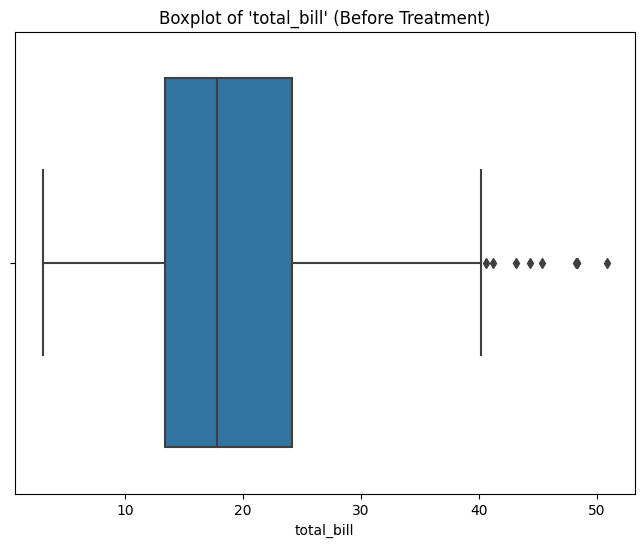

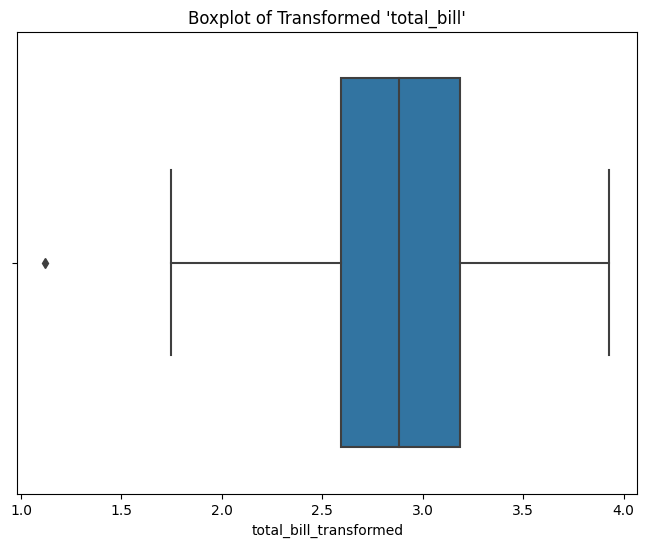

In [28]:
# Plot the boxplot before treatment
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='total_bill')
plt.title("Boxplot of 'total_bill' (Before Treatment)")
plt.xlabel("total_bill")
plt.show()

# Calculate the quartiles and interquartile range (IQR)
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Treat the outliers using a transformation approach (log transformation in this example)
df['total_bill_transformed'] = np.log(df['total_bill'])

# Plot the boxplot after treatment
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='total_bill_transformed')
plt.title("Boxplot of Transformed 'total_bill'")
plt.xlabel("total_bill_transformed")
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [29]:
# Calculate the quartiles and IQR for the 'tip' column
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers in the 'tip' column
outliers = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]

# Remove outliers from the DataFrame
data_filtered = df[~((df['tip'] < lower_bound) | (df['tip'] > upper_bound))]

# Print the count of removed outliers
print("Number of outliers removed:", len(outliers))

# Print the shape of the filtered data
print("Shape of filtered data:", data_filtered.shape)

Number of outliers removed: 8
Shape of filtered data: (235, 8)


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [32]:
# Select the categorical columns to encode
categorical_columns = ['sex', 'smoker', 'day']

# Perform one-hot encoding using get_dummies
encoded_df = pd.get_dummies(df, columns=categorical_columns)

# Print random 5 samples from the encoded DataFrame
print(encoded_df.sample(5))

     total_bill   tip    time  size  total_bill_transformed  sex_Female  \
128       11.38  2.00   Lunch     2                2.431857        True   
234       15.53  3.00  Dinner     2                2.742774       False   
211       25.89  5.16  Dinner     4                3.253857       False   
144       16.43  2.30   Lunch     2                2.799109        True   
150       14.07  2.50  Dinner     2                2.644045       False   

     sex_Male  smoker_No  smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thur  
128     False       True       False    False    False    False      True  
234      True      False        True    False     True    False     False  
211      True      False        True    False     True    False     False  
144     False       True       False    False    False    False      True  
150      True       True       False    False    False     True     False  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [33]:
# Calculate the range of the 'total_bill' column
bill_range = df['total_bill'].max() - df['total_bill'].min()

# Transform the values to have a range of 1
df['total_bill_transformed'] = (df['total_bill'] - df['total_bill'].min()) / bill_range

# Print the transformed column
print(df['total_bill_transformed'])

0      0.291579
1      0.152283
2      0.375786
3      0.431713
4      0.450775
         ...   
239    0.543779
240    0.505027
241    0.410557
242    0.308965
243    0.329074
Name: total_bill_transformed, Length: 243, dtype: float64


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [36]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['size', 'day', 'sex']
df = pd.get_dummies(df, columns=categorical_columns)

# Store the target column 'tip' in y and the remaining columns in X
X = df.drop('tip', axis=1)
y = df['tip']

# Print a sample of X and y
print("Sample of X:")
print(X.head())
print("\nSample of y:")
print(y.head())

Sample of X:
   total_bill smoker    time  total_bill_transformed  size_1  size_2  size_3  \
0       16.99     No  Dinner                0.291579   False    True   False   
1       10.34     No  Dinner                0.152283   False   False    True   
2       21.01     No  Dinner                0.375786   False   False    True   
3       23.68     No  Dinner                0.431713   False    True   False   
4       24.59     No  Dinner                0.450775   False   False   False   

   size_4  size_5  size_6  day_Fri  day_Sat  day_Sun  day_Thur  sex_Female  \
0   False   False   False    False    False     True     False        True   
1   False   False   False    False    False     True     False       False   
2   False   False   False    False    False     True     False       False   
3   False   False   False    False    False     True     False       False   
4    True   False   False    False    False     True     False        True   

   sex_Male  
0     False  
1      Tr

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [50]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Perform min-max scaling on 'total_bill' and 'Size' columns
scaler = MinMaxScaler()
train_df[['total_bill', 'tip']] = scaler.fit_transform(train_df[['total_bill', 'tip']])
test_df[['total_bill', 'tip']] = scaler.transform(test_df[['total_bill', 'tip']])

# Print the shape of train and test data
print("Shape of train data:", train_df.shape)
print("Shape of test data:", test_df.shape)


Shape of train data: (170, 17)
Shape of test data: (73, 17)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [52]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Select the features and target
X_train = train_df[['total_bill', 'tip']]
y_train = train_df['tip']
X_test = test_df[['total_bill', 'tip']]
y_test = test_df['tip']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 1.0


### Happy Learning:)